<a href="https://colab.research.google.com/github/mbasant330/datascience/blob/main/DS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Google drive for the use of drive

In [7]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Changing the directory of the folder to access the dataset

In [8]:
%cd gdrive/My Drive/Colab Notebooks


/content/gdrive/My Drive/Colab Notebooks


Import all the packages

In [5]:
import pandas as pd       #data processing
import numpy as np 
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')


Import Datasets


In [9]:
data=pd.read_csv("nyc_taxi_trip_duration.csv")

Exploring The dataset

In [10]:
data.shape
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


Passenger Count

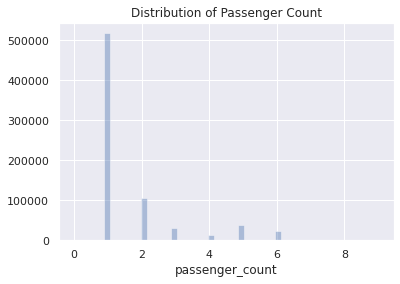

In [11]:
sns.distplot(data['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

**Performing Regression**

In [12]:
print('The value of largest 5 trip duration values are as follows : \n {} '.format(data['trip_duration'].nlargest(5)))
print('The the number of rows with 1 as their trip duration values is {}'.format(len(data[data['trip_duration']==1 ])))
data=data[data.trip_duration!=data.trip_duration.max()]
data=data[data.trip_duration!=data.trip_duration.min()]

The value of largest 5 trip duration values are as follows : 
 21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
Name: trip_duration, dtype: int64 
The the number of rows with 1 as their trip duration values is 13


In [13]:
data['trip_duration_hour']=data['trip_duration']/3600 
data.passenger_count.value_counts()


1    517403
2    105096
5     38926
3     29692
6     24107
4     14050
0        32
7         1
9         1
Name: passenger_count, dtype: int64

In [14]:
data=data[data.passenger_count<=6]
data=data[data.passenger_count!=0]

# **Pickup and Drop date & Time**

In [20]:
from math import radians, cos, sin, asin, sqrt
def haversine(data):
    lat1, lon1, lat2, lon2 = data.pickup_latitude,data.pickup_longitude,data.dropoff_latitude,data.dropoff_longitude 
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

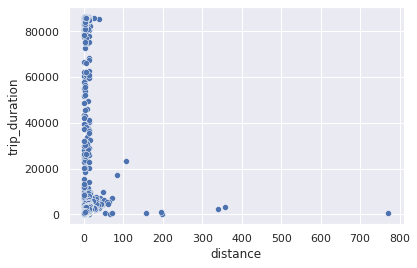

In [21]:
data['distance'] = data.apply(lambda x: haversine(x), axis = 1)
sns.scatterplot(x='distance',y='trip_duration',data=data)

The no of rows with distance =0 are 0


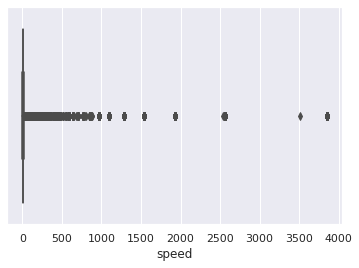

In [27]:
print('The no of rows with distance =0 are {}'.format(len(data[data.distance==0])))
mean_dist=data['distance'].mean()
data.loc[data['distance']==0,'distance']=mean_dist
data['speed']=data['distance']/data['trip_duration_hour']
sns.boxplot(data['speed'])


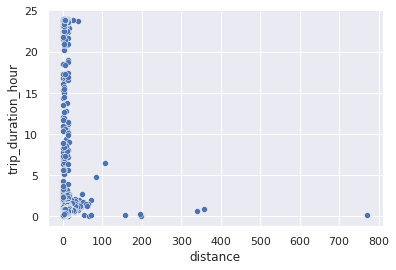

In [28]:
sns.scatterplot(x='distance',y='trip_duration_hour',data=data)

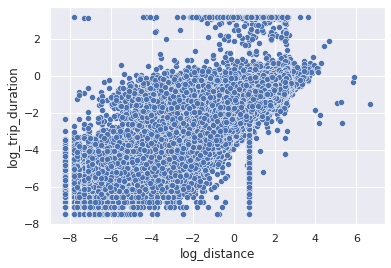

In [29]:
data['log_distance']=np.log(data.distance)
data['log_trip_duration']=np.log(data.trip_duration_hour)
sns.scatterplot(x='log_distance',y='log_trip_duration',data=data)